# Kaggle - Titanic

In [342]:
# Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  

In [343]:
# List files
os.listdir("../dados/")

['all.zip', 'gender_submission.csv', 'test.csv', 'train.csv']

In [344]:
# Read data
train_df = pd.read_csv('../dados/train.csv')
test_df = pd.read_csv('../dados/test.csv')

In [345]:
test_df.shape

(418, 11)

In [346]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data information

1. Age ==>> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

2. Sibsp ==>> The dataset defines family relations in this way...

   a. Sibling = brother, sister, stepbrother, stepsister

   b. Spouse = husband, wife (mistresses and fiancés were ignored)

3. Parch ==>> The dataset defines family relations in this way...

   a. Parent = mother, father

   b. Child = daughter, son, stepdaughter, stepson

   c. Some children travelled only with a nanny, therefore parch=0 for them.

4. Pclass ==>> A proxy for socio-economic status (SES)

   1st = Upper
   2nd = Middle
   3rd = Lower
5. Embarked ==>> nominal datatype
6. Name ==>> nominal datatype . It could be used in feature engineering to derive the gender from title
7. Sex ==>> nominal datatype
8. Ticket ==>> that have no impact on the outcome variable. Thus, they will be excluded from analysis
9. Cabin ==>> is a nominal datatype that can be used in feature engineering
10. Fare ==>> Indicating the fare
11. PassengerID ==>> have no impact on the outcome variable. Thus, it will be excluded from analysis
12. Survival is ==>> dependent variable , 0 or 1

In [347]:
#Data information

print("Shape: " + str(train_df.shape))
print("Size: " + str(train_df.size))

Shape: (891, 12)
Size: 10692


In [348]:
#Count NA values on each column
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [349]:
#Info about dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [350]:
# Class information
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [351]:
test_df.groupby('Pclass').count()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,107,107,107,98,107,107,107,107,80,107
2,93,93,93,88,93,93,93,93,7,93
3,218,218,218,146,218,218,218,217,4,218


Text(0.5,1,'Total by gender')

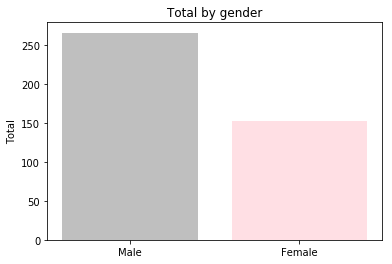

In [352]:
male = len(test_df.loc[test_df['Sex'] == 'male'])
female = len(test_df.loc[test_df['Sex'] == 'female'])

objects = ('Male', 'Female')
y_pos = np.arange(len(objects))
data = [male, female]

plt.bar(y_pos, data, align='center', alpha=0.5, color=["gray", "pink"])
plt.xticks(y_pos, objects)
plt.ylabel('Total')
plt.title('Total by gender')

## Encoding

In [353]:
# Get average of age
#total = train_df['Age'].mean()

In [354]:
# Replace nan ages value with average
#train_df['Age'] = train_df['Age'].fillna(total)

In [355]:
#train_df["Fare"].isnull().sum()

In [356]:
#train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())

In [357]:
#train_df["Embarked"].isnull().sum()

In [358]:
#train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [359]:
data_df = train_df.append(test_df)

In [360]:
data_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [361]:
data_df['Title'] = data_df['Name']
# Cleaning name and extracting Title
for name_string in data_df['Name']:
    data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Replacing rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
    
# Substituting Age values in TRAIN_DF and TEST_DF:
train_df['Age'] = data_df['Age'][:891]
test_df['Age'] = data_df['Age'][891:]

# Dropping Title feature
data_df.drop('Title', axis = 1, inplace = True)

In [362]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

train_df = transform_features(train_df)
test_df = transform_features(test_df)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


In [363]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,892,3,male,Young Adult,0,0,1_quartile,N,"Kelly,",Mr.
1,893,3,female,Adult,1,0,1_quartile,N,"Wilkes,",Mrs.
2,894,2,male,Senior,0,0,2_quartile,N,"Myles,",Mr.
3,895,3,male,Young Adult,0,0,2_quartile,N,"Wirz,",Mr.
4,896,3,female,Student,1,1,2_quartile,N,"Hirvonen,",Mrs.


In [364]:
def encode_features(train_df, test_df):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([train_df[features], test_df[features]])
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df_combined[feature])
        train_df[feature] = le.transform(train_df[feature])
        test_df[feature] = le.transform(test_df[feature])
    return train_df, test_df

In [365]:
train_df, test_df = encode_features(train_df, test_df)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,6,0,0,0,7,329,16
3,4,1,1,0,6,1,0,3,2,267,20
4,5,0,3,1,6,0,0,1,7,15,19


In [366]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,892,3,1,6,0,0,0,7,401,19
1,893,3,0,0,1,0,0,7,843,20
2,894,2,1,3,0,0,1,7,552,19
3,895,3,1,6,0,0,1,7,851,19
4,896,3,0,4,1,1,1,7,342,20


## train_test_split

In [367]:
#x_all = train_df.drop(['Survived', 'PassengerId'], axis=1)
#y_all = train_df['Survived']

#num_test = 0.3
#X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)

In [368]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.utils.testing import ignore_warnings
from sklearn.preprocessing import StandardScaler

## StandardScaler

In [372]:
X_train = train_df.drop('Survived', 1)
y_train = train_df['Survived']
X_test = test_df.copy()
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [373]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

## RANDOM FOREST

In [374]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Choose the type of classifier. 
rf_grid = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(rf_grid, parameters, cv=10, refit=True, scoring=acc_scorer, verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_grid = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_grid.fit(X_train, y_train)

rfc_prediction = rf_grid.predict(X_test)
#rfc_score=accuracy_score(y_test, rfc_prediction)
rfc_score = cross_val_score(rf_grid, X_train, y_train, cv=10, scoring='accuracy')
print(rfc_score)
print(rfc_score.mean())


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    5.6s finished


[0.82222222 0.88888889 0.7752809  0.80898876 0.86516854 0.83146067
 0.80898876 0.80898876 0.84269663 0.82954545]
0.8282229599364431


## XGBoost

In [375]:
from xgboost import XGBClassifier
import xgboost
xgboost = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
xgb_prediction = xgboost.predict(X_test)
#xgb_score= accuracy_score(y_test, xgb_prediction)
#print(xgb_score)
xgb_score = cross_val_score(xgboost, X_train, y_train, cv=10, scoring='accuracy')
print(xgb_score)
print(xgb_score.mean())

[0.86666667 0.76666667 0.76404494 0.6741573  0.85393258 0.82022472
 0.80898876 0.80898876 0.83146067 0.82954545]
0.8024676540687776


## Logistic Regression

In [376]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Prediction
logreg_prediction = logreg.predict(X_test)
logreg_score = cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print(logreg_score)
print(logreg_score.mean())

[0.82222222 0.76666667 0.7752809  0.82022472 0.79775281 0.78651685
 0.7752809  0.79775281 0.78651685 0.80681818]
0.7935032913403699


# SVM

In [377]:
from sklearn import svm

#Create list of c values to try
#c_vals = list(range(1, 100))

#Accuracy list
#accuracy = [0 for i in range(99)]

#for i, c in enumerate(c_vals):
#    clf = svm.SVC(C=c, gamma=0.01)
#    clf.fit(X_train, y_train)

    #svm_prediction = clf.predict(X_test)
    #accuracy[i] = accuracy_score(y_test, svm_prediction)

#print("Best C Value:", c_vals[accuracy.index(max(accuracy))])
#print("Prediction Accuracy: ", max(accuracy))

clf = svm.SVC()
param_grid = {'C':uniform(0.1, 5000), 'gamma':uniform(0.0001, 1)}
rand_svc = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=100)
clf.fit(X_train, y_train)
rfc_score = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(rfc_score)
print(rfc_score.mean())

[0.83333333 0.83333333 0.7752809  0.86516854 0.83146067 0.82022472
 0.80898876 0.78651685 0.82022472 0.82954545]
0.8204077289751448


In [378]:
param_grid = {'C': [0.1,10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svc_grid = GridSearchCV(svm.SVC(), param_grid, cv=10, refit=True, verbose=1)
svc_grid.fit(X_train,y_train)
sc_svc = get_best_score(svc_grid)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   22.5s finished


0.8181818181818182
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


## KNN

In [379]:
from sklearn.neighbors import KNeighborsClassifier

#Create list of c values to try
#ks = [i + 1 for i in range(20)]

#Accuracy list
#accuracy = [0 for i in range(20)]

#Loop through c_values
#for i, k in enumerate(ks):
#    neigh = KNeighborsClassifier(n_neighbors=k)
#    neigh.fit(X_train, y_train) 

#    knn_predict = neigh.predict(X_test)
#    accuracy[i] = accuracy_score(y_test, knn_predict)
    
#print("Best k Value:", ks[accuracy.index(max(accuracy))])
#print("Prediction Accuracy: ", max(accuracy))

neigh = KNeighborsClassifier()
leaf_range = list(range(3, 15, 2))
k_range = list(range(1, 15, 2))
weight_options = ['uniform', 'distance']
param_grid = dict(leaf_size=leaf_range, n_neighbors=k_range, weights=weight_options)
print(param_grid)

knn_grid = GridSearchCV(neigh, param_grid, cv=10, verbose=1, scoring='accuracy')
knn_grid.fit(X_train, y_train)

score_knn = get_best_score(knn_grid)

{'leaf_size': [3, 5, 7, 9, 11, 13], 'n_neighbors': [1, 3, 5, 7, 9, 11, 13], 'weights': ['uniform', 'distance']}
Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   22.7s finished


0.8204264870931538
{'leaf_size': 3, 'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

param_grid = {'min_samples_split': [4,7,10,12]}
dtree_grid = GridSearchCV(dtree, param_grid, cv=10, refit=True, verbose=1)
dtree_grid.fit(X_train,y_train)

print(dtree_grid.best_score_)
print(dtree_grid.best_params_)
print(dtree_grid.best_estimator_)

## Gradient Boost Decision Tree GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()

param_grid = {'n_estimators': [50, 100], 
              'min_samples_split': [3, 4, 5, 6, 7],
              'max_depth': [3, 4, 5, 6]}
gbdt_grid = GridSearchCV(gbdt, param_grid, cv=10, refit=True, verbose=1)
gbdt_grid.fit(X_train,y_train)
sc_gbdt = get_best_score(gbdt_grid)

## eXtreme Gradient Boosting - XGBoost

In [ ]:
xgb = XGBClassifier()
param_grid = {'max_depth': [5,6,7,8], 'gamma': [1, 2, 4], 'learning_rate': [0.1, 0.2, 0.3, 0.5]}

with ignore_warnings(category=DeprecationWarning):
    xgb_grid = GridSearchCV(xgb, param_grid, cv=10, refit=True, verbose=1)
    xgb_grid.fit(X_train,y_train)
    sc_xgb = get_best_score(xgb_grid)

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

param_grid = {'n_estimators': [30, 50, 100], 'learning_rate': [0.08, 0.1, 0.2]}
ada_grid = GridSearchCV(ada, param_grid, cv=10, refit=True, verbose=1)
ada_grid.fit(X_train,y_train)
sc_ada = get_best_score(ada_grid)

pred_all_ada = ada_grid.predict(X_test)

## CatBoost

In [ ]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()

param_grid = {'iterations': [100, 150], 'learning_rate': [0.3, 0.4, 0.5], 'loss_function' : ['Logloss']}

cat_grid = GridSearchCV(cat, param_grid, cv=10, refit=True, verbose=1)
cat_grid.fit(X_train,y_train, verbose=False)
sc_cat = get_best_score(cat_grid)

pred_all_cat = cat_grid.predict(X_test)

## lightbm LGBM

In [ ]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(silent=False)
param_grid = {"max_depth": [8,10,15], "learning_rate" : [0.008,0.01,0.012], 
              "num_leaves": [80,100,120], "n_estimators": [200,250]  }
lgbm_grid = GridSearchCV(lgbm, param_grid, cv=10, refit=True, verbose=1)
lgbm_grid.fit(X_train,y_train, verbose=True)
sc_lgbm = get_best_score(lgbm_grid)

pred_all_lgbm = lgbm_grid.predict(X_test)

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

votingclf_grid = GridSearchCV(estimator=eclf, param_grid=params, cv=10)
votingclf_grid.fit(X_train,y_train)
sc_vot1 = get_best_score(votingclf_grid)

In [ ]:
clf4 = GradientBoostingClassifier()
clf5 = svm.SVC()
clf6 = RandomForestClassifier()

eclf_2 = VotingClassifier(estimators=[('gbdt', clf4), 
                                      ('svc', clf5), 
                                      ('rf', clf6)], voting='soft')

params = {'gbdt__n_estimators': [50], 'gbdt__min_samples_split': [3],
          'svc__C': [10, 100] , 'svc__gamma': [0.1,0.01,0.001] , 'svc__kernel': ['rbf'] , 'svc__probability': [True],  
          'rf__max_depth': [7], 'rf__max_features': [2,3], 'rf__min_samples_split': [3] } 

with ignore_warnings(category=DeprecationWarning):
    votingclf_grid_2 = GridSearchCV(estimator=eclf_2, param_grid=params, cv=10)
    votingclf_grid_2.fit(X_train,y_train)
    sc_vot2_cv = get_best_score(votingclf_grid_2)

## StackingClassifier

In [ ]:
from mlxtend.classifier import StackingClassifier
# Initializing models
clf1 = xgb_grid.best_estimator_
clf2 = gbdt_grid.best_estimator_
clf3 = votingclf_grid_2.base_estimator_
clf4 = svc_grid.best_estimator_

lr = LogisticRegression()
st_clf = StackingClassifier(classifiers=[clf1, clf2, clf4], meta_classifier=lr)

params = {'meta-logisticregression__C': [0.1,1.0,5.0,10.0] ,
          #'use_probas': [True] ,
          #'average_probas': [True] ,
          'use_features_in_secondary' : [True, False]
         }

with ignore_warnings(category=DeprecationWarning):
    st_clf_grid = GridSearchCV(estimator=st_clf, param_grid=params, cv=5, refit=True)
    st_clf_grid.fit(X_train, y_train)
    sc_st_clf = get_best_score(st_clf_grid)
    pred_all_stack = st_clf_grid.predict(X_test)

## Submission

In [382]:
result = clf.predict(test_df)

In [383]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": result
    })
submission.to_csv('titanic.csv', index=False)

In [ ]:
submission.head(20)